In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sales = pd.read_csv("SalesData.csv")
display(sales)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


### 1. Compare Sales by region for 2016 with 2015 using bar chart

,TotalSales2015,TotalSales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


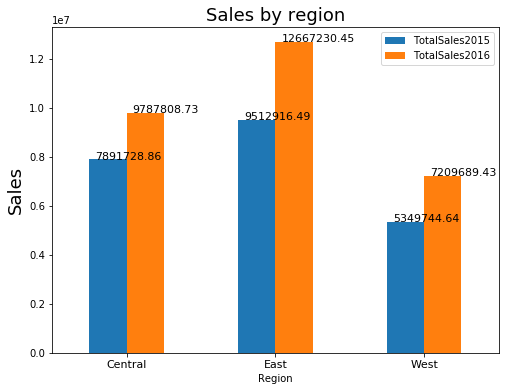

In [29]:
from matplotlib import pyplot as plt
sales1 = sales.groupby(['Region'])[['Sales2015','Sales2016']].aggregate('sum').add_prefix('Total')
display(sales1)

sales1graph=sales1.plot.bar(figsize=(8,6))
sales1graph.set_alpha(0.8)
sales1graph.set_title("Sales by region",fontsize=18)
sales1graph.set_ylabel("Region", fontsize=18);
sales1graph.set_ylabel("Sales", fontsize=18);
sales1graph.set_xticklabels(["Central", "East","West"], rotation=0, fontsize=11)

# plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),title='Year')
# plt.show()

# set individual bar lables using above list
for i in sales1graph.patches:
    # get_width pulls left or right; get_y pushes up or down
    sales1graph.text(i.get_x()+.04, i.get_height()+12000, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',rotation=0)

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

,Sales2016
Region,
Central,9.787809e+06
East,1.266723e+07
West,7.209689e+06


array([<matplotlib.axes._subplots.AxesSubplot object at 0x01330C58>],
      dtype=object)

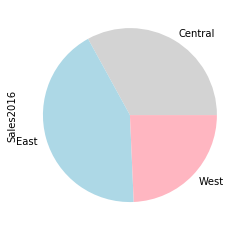

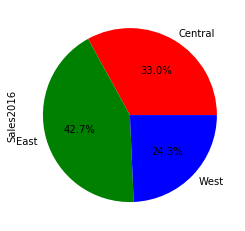

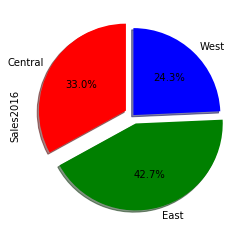

In [60]:
sales2 = sales.groupby(['Region'])[['Sales2016']].aggregate('sum')
display(sales2)

sales2.plot(kind='pie', 
            labels=['Central','East','West'], 
            colors=['lightgray', 'lightblue', 'lightpink'],
            subplots='true',legend=False)

sales2.plot(kind='pie', 
            labels=['Central','East','West'], 
            colors=['r', 'g', 'b'],
            autopct='%1.1f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true',legend=False)

explode = (0.1, 0.1, 0)
sales2.plot(kind='pie', 
            labels=['Central','East','West'], 
            colors=['r', 'g', 'b'],
            autopct='%1.1f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true',explode=explode,shadow=True, startangle=90,legend=False)

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

TotalSales2015  TotalSales2016
Region  Tier                                
Central High    4.798698e+06    6.026043e+06
        Low     9.434397e+05    1.132833e+06
        Med     2.068226e+06    2.632181e+06
        Out     8.136489e+04   -3.248530e+03
East    High    6.102946e+06    7.817151e+06
        Low     9.016658e+05    1.144930e+06
        Med     2.470998e+06    3.705150e+06
        Out     3.730655e+04    0.000000e+00
West    High    2.944789e+06    3.768038e+06
        Low     6.710644e+05    1.099502e+06
        Med     1.718476e+06    2.342149e+06
        Out     1.541508e+04    0.000000e+00

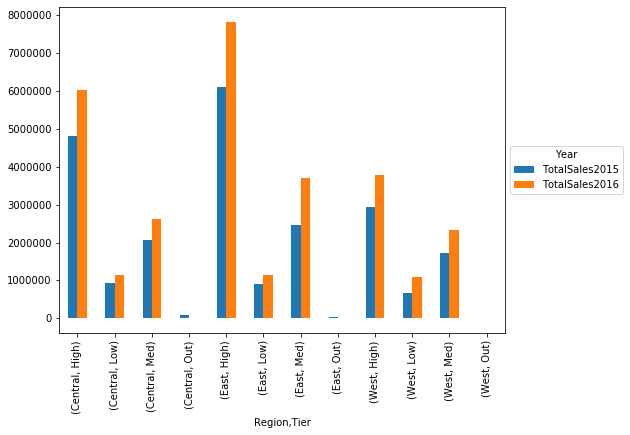

In [64]:
sales3 = sales.groupby(['Region','Tier'])[['Sales2015','Sales2016']].aggregate('sum').add_prefix('Total')
display(sales3)

sales3graph=sales3.plot.bar(figsize=(8,6))
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),title='Year')
plt.show()

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

,TotalSales2015,TotalSales2016
State,,
CT,197202.790,323502.31
DC,216723.950,257421.69
FL,1660162.000,2508232.28
GA,681546.460,946919.77
MA,419278.750,687096.45
MD,527309.060,750008.79
ME,77425.640,183673.05
NC,1292801.640,1610521.00
NH,136419.380,144717.51


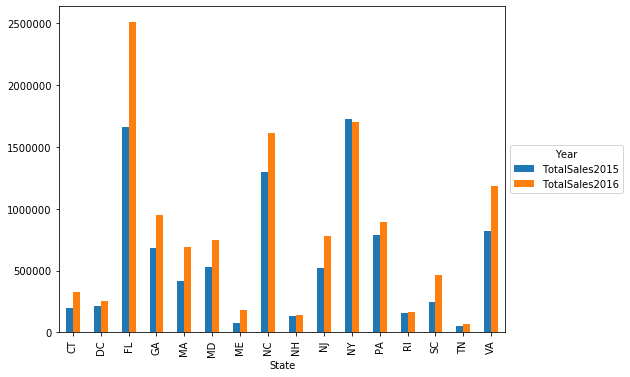

In [68]:
sales4 = sales.loc[sales.Region == 'East'].groupby(['State'])[['Sales2015','Sales2016']].aggregate('sum').add_prefix('Total')
display(sales4)

sales4graph=sales4.plot.bar(figsize=(8,6))
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),title='Year')
plt.show()

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

,TotalUnits2015,TotalUnits2016
Division,,
BIG APPLE,297.8330,356.0000
CHARGERS,228.8333,312.4999
CONGRESSIONAL,306.5012,413.0006
DIAMONDBACK,303.5001,419.0001
EMPIRE,529.8335,563.3336
GRIDIRON,278.0006,340.1675
GULF STREAM,395.8333,624.3343
HAILSTORM,350.0003,456.1669
KINETIC,371.3334,434.5001


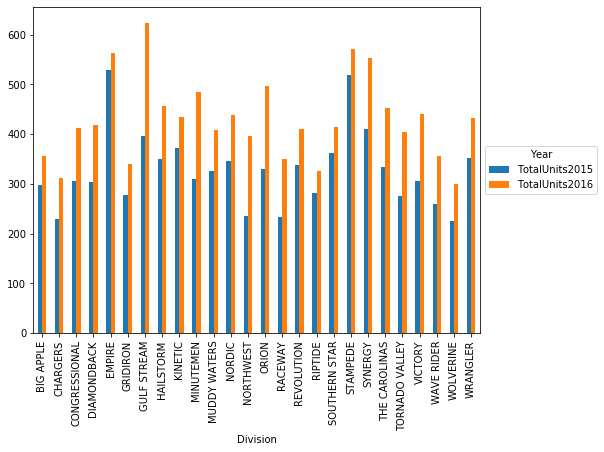

In [70]:
sales5 = sales.groupby(['Division'])[['Units2015','Units2016']].aggregate('sum').add_prefix('Total')
display(sales5)

sales5graph=sales5.plot.bar(figsize=(8,6))
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),title='Year')
plt.show()

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [71]:
import numpy as np

sales['Qtr'] = np.where((pd.to_datetime(sales.Month, format='%b').dt.month<4),'Q1',
                        np.where((pd.to_datetime(sales.Month, format='%b').dt.month<7),'Q2',
                                 np.where((pd.to_datetime(sales.Month, format='%b').dt.month<10),'Q3','Q4')))
display(sales)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


,TotalSales2015,TotalSales2016
Qtr,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


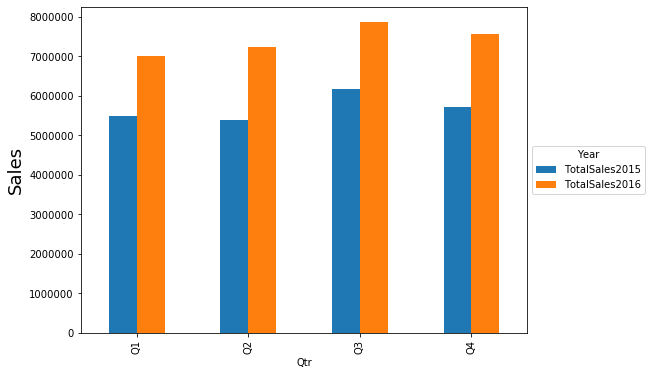

In [78]:
sales7 = sales.groupby(['Qtr'])[['Sales2015','Sales2016']].aggregate('sum').add_prefix('Total')
display(sales7)

sales7graph=sales7.plot.bar(figsize=(8,6),stacked=False)
sales7graph.set_ylabel("Sales", fontsize=18);
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),title='Year')
plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [92]:
#8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
sales8 = sales[sales['Tier']!='Out']
sales8 = sales8.groupby(['Qtr','Tier'])[['Sales2016']].aggregate('sum').add_prefix('Total')
sales8 = sales8.round(decimals=0)
sales8 = sales8.stack() # long to wide data
sales8 = sales8.unstack(level=0)
display(sales8)



,Qtr,Q1,Q2,Q3,Q4
Tier,,,,,
High,TotalSales2016,3867719.0,4130953.0,4872559.0,4740002.0
Low,TotalSales2016,948833.0,890595.0,795178.0,742659.0
Med,TotalSales2016,2181402.0,2215814.0,2197058.0,2085207.0


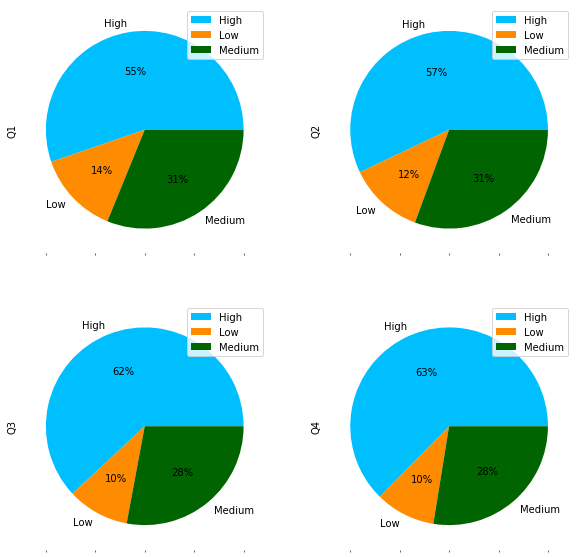

In [93]:
sales8.plot(kind='pie', 
            labels=['High', 'Low', 'Medium'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()